In [3]:
path="C:/Users/sriya/Downloads/Fashion_Sales_Dataset (1).xlsx"

In [5]:
import pandas as pd

In [7]:
# Load the dataset
df = pd.read_excel(path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Age Group         31047 non-null  object
 6   Date              31047 non-null  object
 7   Month             31047 non-null  object
 8   Status            31047 non-null  object
 9   Channel           31047 non-null  object
 10  SKU               31047 non-null  object
 11  Category          31047 non-null  object
 12  Size              31047 non-null  object
 13  Qty               31047 non-null  int64 
 14  currency          31047 non-null  object
 15  Amount            31047 non-null  int64 
 16  ship-city         31047 non-null  object
 17  ship-state  

,Index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Adult,2023-12-04 00:00:00,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,2023-12-04 00:00:00,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,2023-12-04 00:00:00,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,2023-12-04 00:00:00,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)


Missing Values:
 Index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Date                0
Month               0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64


In [11]:
# Summary of numerical features
df.describe()

# Summary of categorical features
df.describe(include="object")


,Order ID,Gender,Age Group,Date,Month,Status,Channel,SKU,Category,Size,currency,ship-city,ship-state,ship-country
count,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047
unique,28471,2,3,37,12,4,7,5287,8,11,1,2603,50,1
top,403-4984515-8861958,Women,Adult,2023-02-05 00:00:00,Mar,Delivered,Amazon,JNE3797-KR-L,Set,M,INR,BENGALURU,MAHARASHTRA,IN
freq,12,21553,19535,1166,2819,28641,11016,273,12391,5485,31047,2540,4519,31047


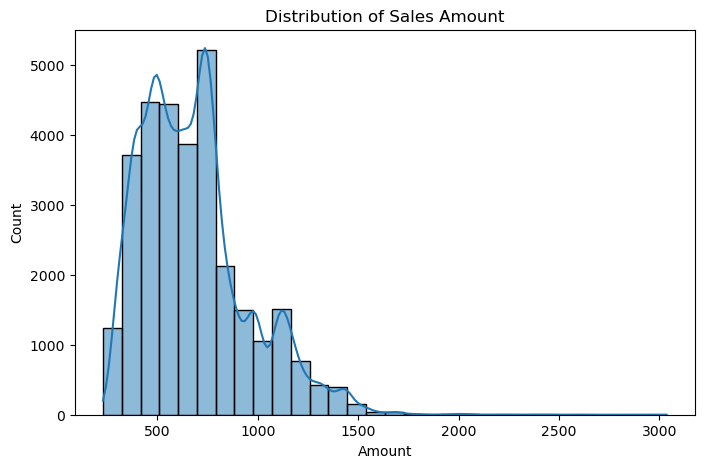

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#Univariate Analysis
# Plot distribution of Amount
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=30, kde=True)
plt.title("Distribution of Sales Amount")
plt.show()


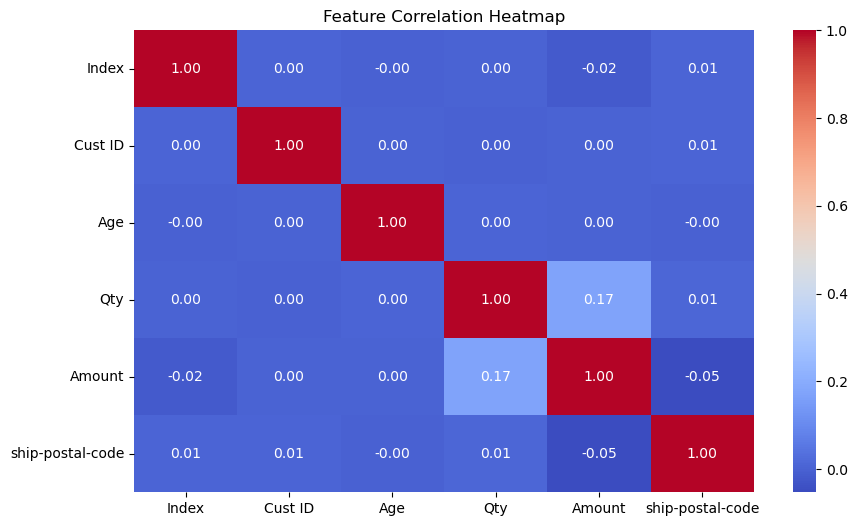

In [19]:
import numpy as np

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  

# Check if numeric_df is empty
if numeric_df.empty:
    print("No numerical columns available for correlation.")
else:
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()



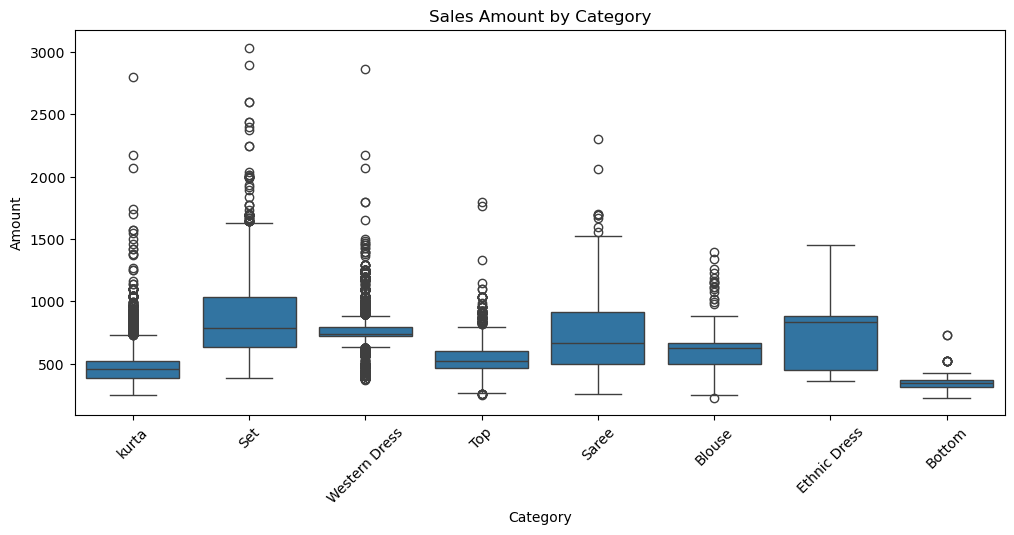

In [23]:
# Boxplot: Sales Amount by Category
plt.figure(figsize=(12, 5))
sns.boxplot(x="Category", y="Amount", data=df)
plt.xticks(rotation=45)
plt.title("Sales Amount by Category")
plt.show()


In [31]:
# List all columns
print("Columns in Dataset:\n", df.columns)

# Select final independent variables based on analysis
selected_columns = [
    "Gender", "Age", "Age Group", "Month", 
    "Category", "Size", "Qty", "Amount", "ship-city", "ship-state"
]

# Create the final dataset
df_final = df[selected_columns]

# Display the updated dataset
df_final.head()


Columns in Dataset:
 Index(['Index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Age Group', 'Date',
       'Month', 'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')


,Gender,Age,Age Group,Month,Category,Size,Qty,Amount,ship-city,ship-state
0,Women,44,Adult,Dec,kurta,XXL,1,376,MOHALI,PUNJAB
1,Women,29,Adult,Dec,Set,L,1,1449,GURUGRAM,HARYANA
2,Women,67,Senior,Dec,Set,S,1,453,KOLKATA,WEST BENGAL
3,Women,20,Teenager,Dec,Set,M,1,729,THANJAVUR,TAMIL NADU
4,Women,62,Senior,Dec,kurta,XXL,1,544,GURUGRAM,HARYANA
